In [17]:
import os
import argparse
import warnings
import numpy as np
from scipy.io import wavfile
import scipy.io as sio
from hmmlearn import hmm
import librosa
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt

In [18]:
class HMMTrainer(object):
    def __init__(self,model_name='GaussianHMM',n_components=4,cov_type='diag',n_iter=1000):
        self.model_name=model_name
        self.n_components= n_components
        self.cov_type=cov_type
        self.n_iter=n_iter
        self.models=[]
        
        if self.model_name=='GaussianHMM':
            self.model=hmm.GaussianHMM(n_components=self.n_components,covariance_type=self.cov_type, n_iter=self.n_iter, params='stmc', init_params='stmc')
        else:
            raise TypeError('Invalid model type')
            
    def train(self,X):
        np.seterr(all='ignore')
        self.models.append(self.model.fit([X]))
        print(self.model.means_.shape)
        np.set_printoptions(precision=2)
        print('model' means:-  ',self.model.means_)
        for items in self.model.means_:
            plt.plot(items)
            plt.show()
            print('each mean',items)
        print('------------------')
        for items in self.model.covars_:
            plt.plot(items.diagonal())
            plt.show()
            print('each variance',items.diagonal())
        
    def get_score(self,input_data):
        return self.model.score(input_data)

mfccs:----   [-367.34  223.92  -78.73  -29.29    8.14  -45.65  -15.22   -5.9   -28.03
   -0.58   -3.29  -27.68  -12.33]
mfccs:----   [-328.45  228.    -78.99  -21.35    8.13  -55.36  -17.48    1.56  -24.76
   -2.89   -0.34  -21.5   -10.11]
mfccs:----   [ -3.27e+02   2.31e+02  -8.18e+01  -2.16e+01   1.42e+01  -5.26e+01
  -1.75e+01   3.27e+00  -2.38e+01  -1.44e+00  -8.63e-02  -2.49e+01
  -1.00e+01]
mfccs:----   [-352.28  235.21  -78.96  -24.93    6.33  -51.76  -14.88   -8.74  -32.78
    1.01   -6.38  -35.    -10.91]
mfccs:----   [-317.76  222.62  -73.75  -21.75   11.36  -50.75  -17.8     4.9   -20.06
   -1.55    1.76  -19.87   -9.49]
mfccs:----   [-337.5   218.08  -78.85  -21.91   10.    -50.54  -14.93   -0.66  -23.47
    3.33   -2.09  -28.79  -12.25]
mfccs:----   [-322.47  215.59  -61.66  -21.85    9.29  -48.57  -25.18   -5.19  -20.11
   -3.13   -8.    -26.17  -10.75]
mfccs:----   [ -3.69e+02   2.39e+02  -6.85e+01  -3.06e+01   1.19e+01  -4.55e+01
  -1.94e+01   5.69e+00  -1.84e+01  -6.40

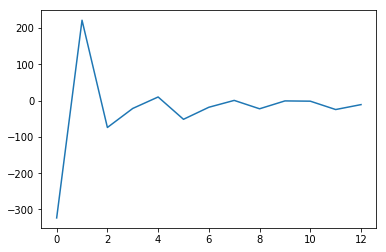

each mean [-323.24  221.57  -74.    -21.5    10.06  -51.45  -18.27    0.65  -22.47
   -0.77   -1.51  -24.52  -10.96]


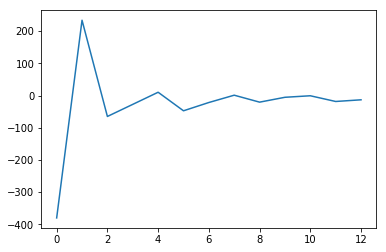

each mean [-380.36  233.91  -65.09  -27.49   10.15  -47.47  -21.72    1.01  -20.62
   -5.51   -0.78  -18.53  -13.34]


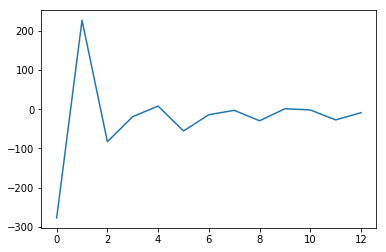

each mean [-277.47  227.02  -82.92  -18.91    7.93  -55.59  -14.1    -2.9   -29.45
    1.2    -1.89  -27.32   -8.87]


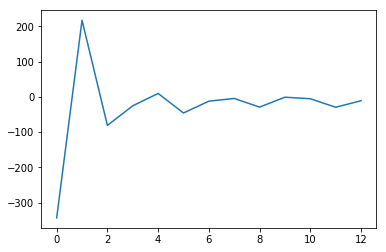

each mean [-343.64  217.7   -80.99  -25.26    9.82  -45.68  -12.09   -4.4   -28.94
   -0.85   -5.23  -29.37  -10.93]
------------------


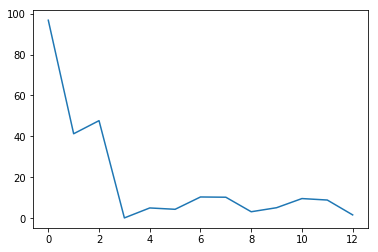

each variance [ 96.72  41.32  47.71   0.23   5.1    4.44  10.45  10.33   3.24   5.21
   9.68   8.96   1.7 ]


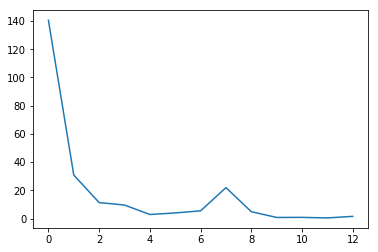

each variance [ 140.54   30.83   11.35    9.61    2.9     4.      5.49   21.93    4.87
    0.8     0.86    0.48    1.57]


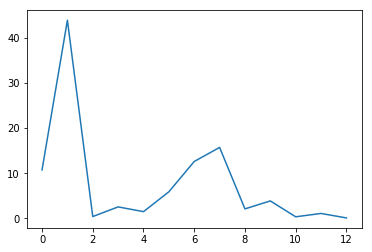

each variance [ 10.73  43.87   0.39   2.53   1.47   5.88  12.59  15.7    2.09   3.85
   0.34   1.08   0.09]


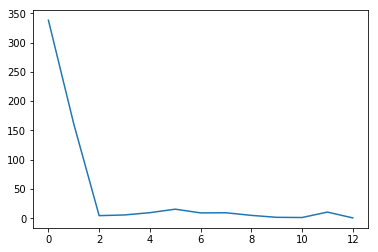

each variance [ 337.98  161.01    4.62    5.8     9.7    15.66    9.33    9.53    5.09
    1.76    1.44   10.7     0.75]
mfccs:----   [-400.18  178.12  -51.72   58.08   56.38  -59.89  -33.35   -7.92  -26.28
   -9.86  -21.9   -23.24    6.26]
mfccs:----   [-400.15  171.91  -55.49   66.48   46.18  -70.32  -21.77   -4.23  -34.76
  -10.7   -21.51  -23.56    7.51]
mfccs:----   [-358.7   188.36  -49.39   45.     37.69  -50.92   -6.22    0.98  -32.1
   -9.68  -18.58  -24.54    3.02]
mfccs:----   [-391.13  173.06  -46.27   54.06   54.6   -54.21  -32.95  -10.15  -26.09
   -9.68  -19.73  -22.16    2.12]
mfccs:----   [-388.92  168.54  -45.04   56.17   48.36  -58.85  -30.7   -11.93  -29.42
   -9.52  -22.24  -23.18    6.56]
mfccs:----   [-358.02  194.71  -64.5    47.37   41.4   -51.68   -4.32   -4.08  -37.47
   -5.29  -16.61  -25.24    5.47]
mfccs:----   [ -3.63e+02   1.88e+02  -5.19e+01   5.20e+01   4.72e+01  -5.50e+01
  -2.08e+01  -9.91e+00  -3.32e+01  -6.13e+00  -1.86e+01  -2.76e+01
   1.90e-01]


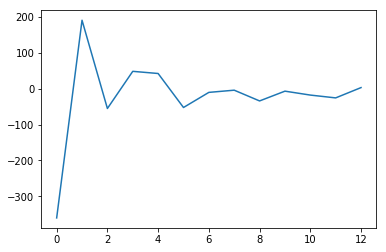

each mean [-359.87  190.35  -55.27   48.13   42.11  -52.53  -10.45   -4.34  -34.25
   -7.03  -17.93  -25.79    2.9 ]


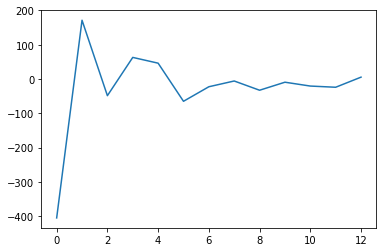

each mean [-405.09  171.13  -48.71   62.78   45.98  -65.12  -22.73   -5.98  -32.9
   -9.51  -20.71  -24.21    5.25]


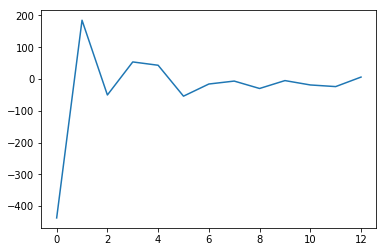

each mean [-437.35  184.8   -50.43   53.57   43.13  -54.16  -15.91   -6.68  -29.99
   -5.13  -18.87  -24.03    5.91]


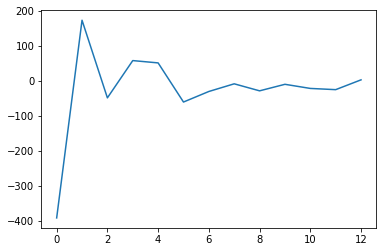

each mean [-391.26  174.02  -47.9    58.65   52.03  -59.88  -29.68   -7.77  -27.85
   -9.17  -20.96  -24.47    3.59]
------------------


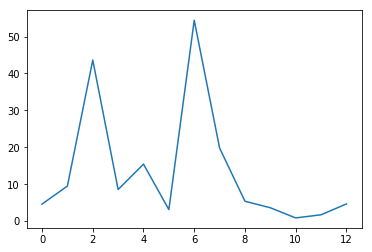

each variance [  4.62   9.51  43.63   8.56  15.44   3.13  54.41  19.82   5.39   3.63
   0.87   1.72   4.66]


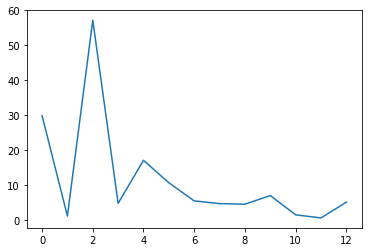

each variance [ 29.9    1.12  57.17   4.77  17.07  10.65   5.46   4.68   4.52   6.99
   1.47   0.59   5.11]


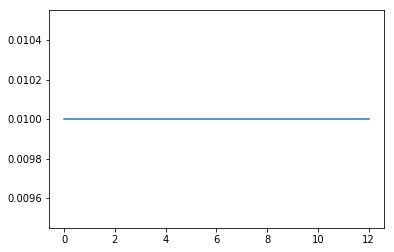

each variance [ 0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01
  0.01]


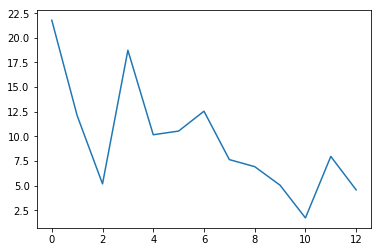

each variance [ 21.78  12.11   5.19  18.74  10.17  10.55  12.56   7.66   6.94   5.06
   1.74   7.98   4.58]
mfccs:----   [ -3.79e+02   2.14e+02  -2.93e+01  -1.35e+01   6.59e+00  -3.79e+01
  -2.26e+01  -1.57e+01  -3.01e+01  -8.23e+00   2.65e-01  -1.04e+01
  -7.79e+00]
mfccs:----   [-333.    216.24  -41.6   -30.66  -11.76  -46.14  -21.3   -15.88  -25.52
   -0.76   -0.75  -11.14   -4.89]
mfccs:----   [-358.09  203.91  -33.57  -25.84    1.25  -33.64  -20.71  -11.53  -23.69
   -5.59    4.61   -6.06   -8.1 ]
mfccs:----   [-375.29  219.47  -42.37  -18.11    5.28  -41.53  -24.34  -20.23  -33.64
   -6.06    2.     -8.96   -6.05]
mfccs:----   [-367.39  215.87  -33.81  -23.7     0.59  -44.31  -33.04  -15.63  -20.72
   -6.94   -3.68   -9.8    -6.32]
mfccs:----   [-361.64  217.17  -40.43  -14.79    7.42  -41.06  -21.11  -14.98  -33.29
   -7.91    3.03   -7.06   -3.21]
mfccs:----   [-361.94  215.6   -37.67  -14.16   11.37  -35.73  -22.39  -18.    -33.04
   -7.14    4.42   -6.67   -7.54]
mfccs:----  

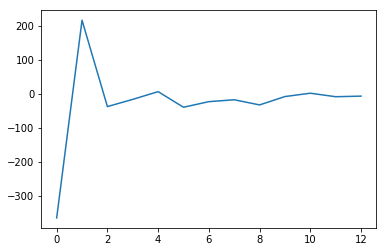

each mean [-364.6   216.88  -37.1   -15.89    6.85  -39.09  -22.58  -17.05  -32.21
   -7.6     2.24   -8.08   -6.35]


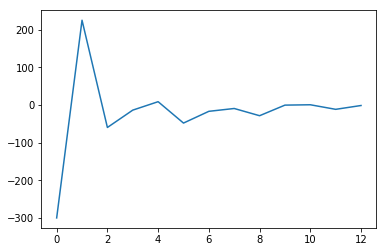

each mean [-300.16  224.8   -59.97  -13.9     8.49  -48.28  -17.09   -9.56  -28.74
   -0.62    0.34  -11.79   -1.63]


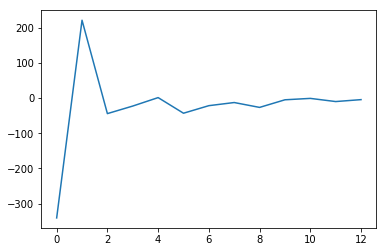

each mean [-340.36  220.65  -44.34  -22.86    1.1   -43.22  -21.78  -12.89  -26.72
   -5.11   -1.14  -10.12   -4.66]


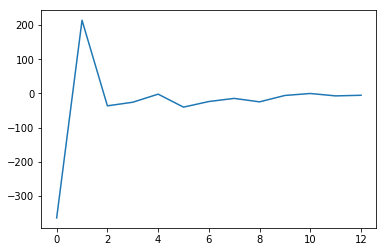

each mean [-364.47  213.89  -36.55  -25.99   -2.36  -40.31  -23.93  -14.78  -24.89
   -6.14   -0.45   -7.45   -5.62]
------------------


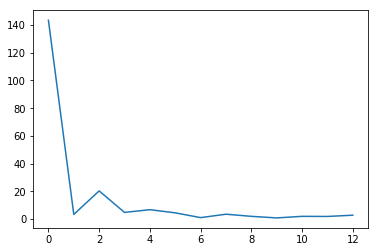

each variance [ 143.47    3.38   20.33    4.83    6.79    4.52    1.06    3.53    1.99
    0.85    1.98    1.9     2.82]


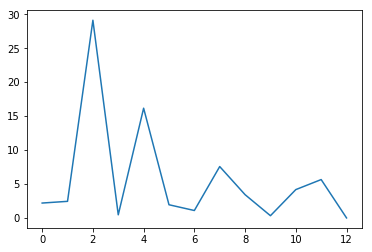

each variance [  2.19e+00   2.45e+00   2.91e+01   4.62e-01   1.62e+01   1.94e+00
   1.10e+00   7.57e+00   3.43e+00   3.31e-01   4.17e+00   5.65e+00
   5.05e-03]


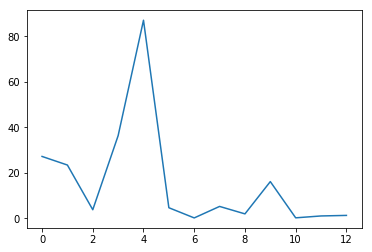

each variance [ 27.2   23.42   3.76  36.35  87.15   4.63   0.15   5.21   1.93  16.13
   0.19   1.01   1.25]


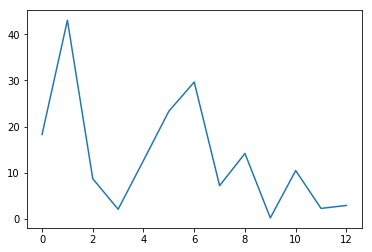

each variance [ 18.3   43.01   8.73   2.12  12.67  23.34  29.64   7.22  14.19   0.25
  10.49   2.31   2.95]
mfccs:----   [-335.52  233.66  -41.01  -29.97   -6.29  -42.49   -7.4     0.74  -32.47
  -12.49    1.04  -15.73   -9.3 ]
mfccs:----   [-322.01  241.79  -56.36  -24.75   -3.98  -49.84   -1.09    4.97  -37.2
   -8.56    6.15  -17.04   -9.95]
mfccs:----   [-371.08  247.36  -37.67  -33.22  -19.26  -47.      1.54   -1.14  -41.41
  -10.99    2.38  -19.18   -8.6 ]
mfccs:----   [ -2.82e+02   2.32e+02  -5.50e+01  -2.68e+01  -2.63e+00  -4.67e+01
  -5.72e+00  -9.68e-02  -3.67e+01  -6.44e+00   7.17e+00  -1.88e+01
  -1.20e+01]
mfccs:----   [-354.8   242.19  -34.89  -35.31  -17.22  -44.09   -1.18    1.8   -36.33
  -12.81    2.27  -18.1   -12.14]
mfccs:----   [-366.84  240.67  -47.01  -33.95  -22.01  -53.64    2.75    3.88  -40.81
  -10.4     6.17  -16.53   -9.14]
mfccs:----   [-364.55  223.93  -27.63  -33.31  -21.19  -47.17   -6.23    0.86  -33.88
  -14.53    1.91  -14.98  -12.42]
mfccs:----   

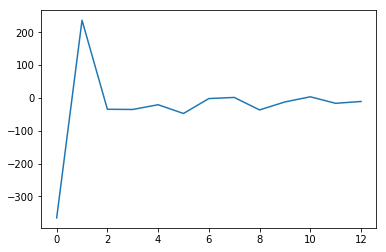

each mean [-365.26  236.67  -34.42  -35.02  -20.6   -47.24   -1.84    1.62  -36.42
  -12.1     3.56  -16.32  -10.64]


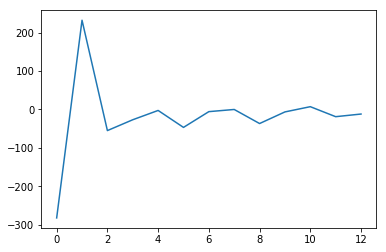

each mean [ -2.82e+02   2.32e+02  -5.50e+01  -2.68e+01  -2.63e+00  -4.67e+01
  -5.72e+00  -9.68e-02  -3.67e+01  -6.44e+00   7.17e+00  -1.88e+01
  -1.20e+01]


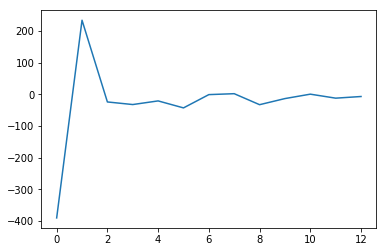

each mean [-389.88  234.25  -23.73  -31.91  -20.44  -42.5    -0.55    2.35  -32.36
  -13.07    0.86  -11.76   -6.54]


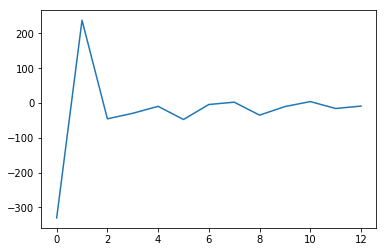

each mean [-330.11  237.77  -45.44  -29.54   -9.58  -47.37   -4.27    2.43  -34.84
  -10.22    4.13  -15.78   -8.84]
------------------


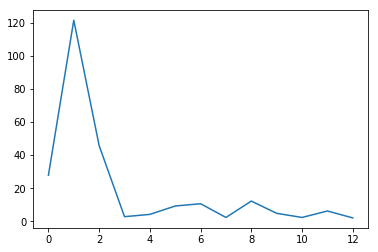

each variance [  27.87  121.6    45.75    2.79    4.17    9.25   10.62    2.32   12.23
    4.82    2.32    6.23    2.04]


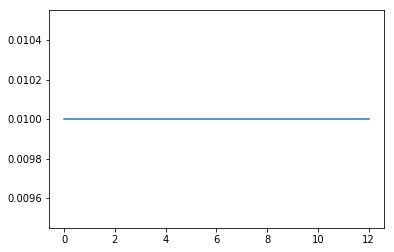

each variance [ 0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01
  0.01]


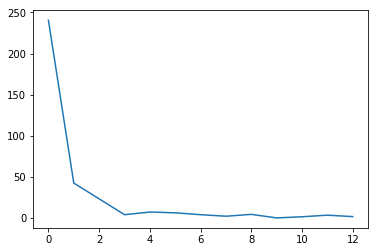

each variance [ 240.55   42.59   23.44    4.15    7.41    6.45    4.17    2.3     4.58
    0.24    1.64    3.58    1.82]


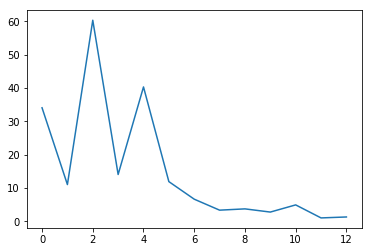

each variance [ 34.06  11.03  60.33  14.05  40.32  11.91   6.64   3.35   3.73   2.77
   4.92   1.02   1.3 ]
mfccs:----   [-367.81  203.44  -36.73  -18.9     1.87  -47.87  -25.55   -3.03  -23.97
  -13.69    1.37   -6.8   -10.28]
mfccs:----   [-358.11  196.97  -45.52  -24.58    3.87  -44.37  -25.75   -4.1   -24.21
  -12.37    4.43   -5.81  -12.45]
mfccs:----   [-368.21  223.16  -46.43  -21.46    0.4   -52.84  -21.84   -0.72  -27.83
  -14.35   -1.25  -13.19  -11.74]
mfccs:----   [-376.75  226.71  -52.32  -18.43    6.22  -57.5   -27.63    2.81  -23.1
  -15.31   -0.88   -8.96  -11.73]
mfccs:----   [-362.22  213.4   -45.7   -26.94   -2.12  -50.05  -24.13   -2.53  -26.14
  -14.47    2.73   -5.21   -9.92]
mfccs:----   [ -3.59e+02   2.12e+02  -3.36e+01  -3.12e+01  -1.42e+01  -5.41e+01
  -2.33e+01   2.93e+00  -1.67e+01  -8.67e+00  -2.25e-01  -1.34e+01
  -1.23e+01]
mfccs:----   [-381.26  215.04  -33.63  -23.8    -9.5   -52.41  -17.61    2.04  -25.47
  -11.4     1.24  -15.04  -13.33]
mfccs:----   

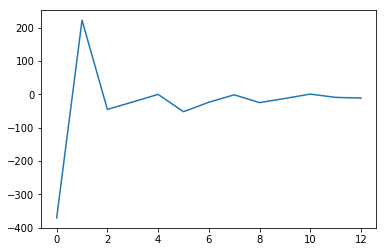

each mean [ -3.71e+02   2.22e+02  -4.53e+01  -2.30e+01  -2.47e-01  -5.22e+01
  -2.38e+01  -1.50e+00  -2.49e+01  -1.25e+01   6.70e-01  -9.21e+00
  -1.13e+01]


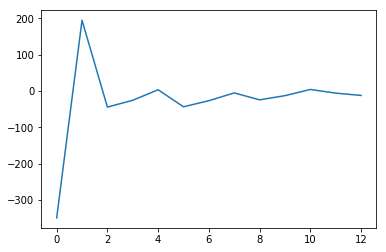

each mean [-349.11  195.2   -43.94  -25.15    3.77  -43.13  -26.32   -4.89  -23.97
  -12.49    4.6    -5.46  -11.82]


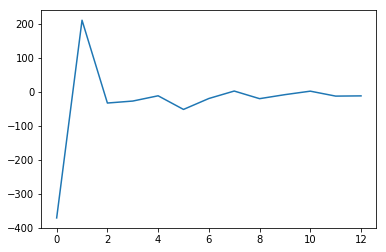

each mean [-371.78  209.85  -33.74  -27.93  -12.45  -52.56  -20.42    1.53  -20.9
   -9.07    1.19  -13.37  -12.7 ]


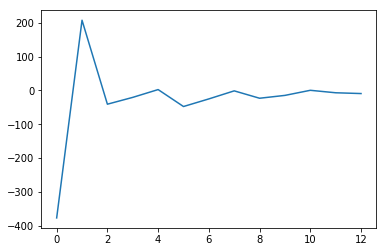

each mean [-376.89  207.53  -40.67  -20.51    2.55  -47.55  -25.05   -1.25  -23.07
  -14.64    0.41   -6.89   -9.21]
------------------


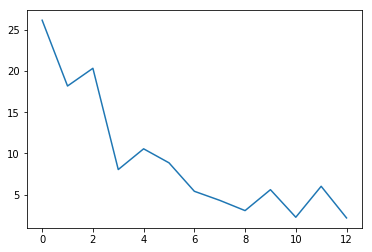

each variance [ 26.15  18.18  20.33   8.05  10.56   8.86   5.41   4.31   3.07   5.61
   2.26   6.02   2.18]


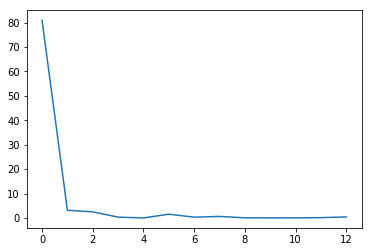

each variance [  8.10e+01   3.13e+00   2.51e+00   3.30e-01   1.51e-02   1.54e+00
   3.27e-01   6.26e-01   6.40e-02   1.86e-02   3.61e-02   1.27e-01
   4.09e-01]


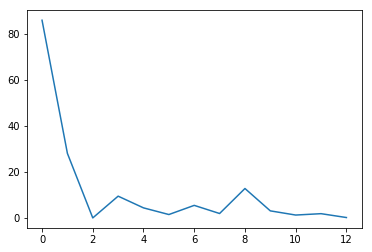

each variance [  8.60e+01   2.81e+01   4.05e-02   9.50e+00   4.41e+00   1.51e+00
   5.50e+00   1.95e+00   1.28e+01   3.11e+00   1.29e+00   1.89e+00
   2.05e-01]


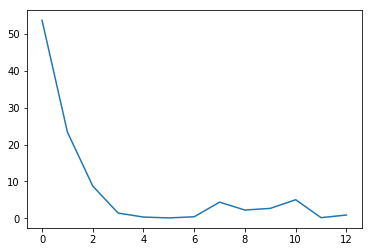

each variance [ 53.76  23.4    8.72   1.4    0.31   0.08   0.39   4.36   2.22   2.67
   5.02   0.16   0.87]
mfccs:----   [-376.73  157.66  -39.89   14.49   18.11  -42.86  -19.3   -11.85  -24.92
    2.03   -5.    -21.96    1.76]
mfccs:----   [-353.34  155.09  -53.58   15.45   20.33  -47.57  -15.24   -9.49  -29.47
    2.     -4.26  -22.5     2.44]
mfccs:----   [ -3.58e+02   1.69e+02  -4.98e+01   2.69e+00   2.58e+01  -3.83e+01
  -2.66e+01  -1.09e+01  -1.95e+01  -3.19e+00  -1.02e+01  -2.00e+01
   8.71e-02]
mfccs:----   [-347.22  163.98  -48.46    8.43   22.44  -44.6   -24.48  -10.45  -23.52
    0.36   -1.97  -17.34   -0.48]
mfccs:----   [-369.15  160.25  -48.31    7.67   27.24  -36.4   -21.84  -11.7   -24.02
    1.24   -2.94  -22.5    -2.28]
mfccs:----   [-301.15  161.77  -58.3     1.59   18.93  -44.06  -19.     -7.99  -26.12
   -0.96   -0.47  -14.58    0.48]
mfccs:----   [-377.04  158.78  -46.7     8.26   27.91  -38.12  -25.82  -11.19  -22.11
   -0.97   -2.7   -18.19   -0.54]
mfccs:----  

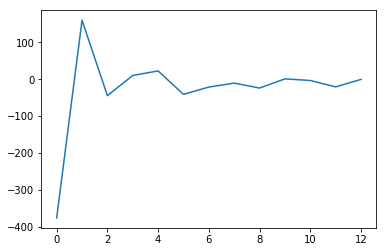

each mean [ -3.76e+02   1.60e+02  -4.44e+01   1.05e+01   2.27e+01  -4.09e+01
  -2.11e+01  -1.04e+01  -2.38e+01   1.12e+00  -3.21e+00  -2.06e+01
  -2.92e-01]


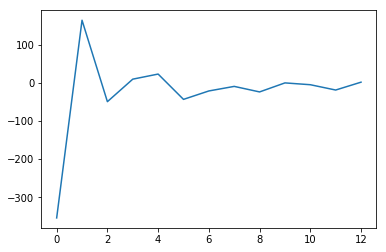

each mean [-354.37  163.72  -49.68    9.29   22.66  -43.68  -21.61   -9.65  -24.16
   -0.51   -5.26  -19.2     1.4 ]


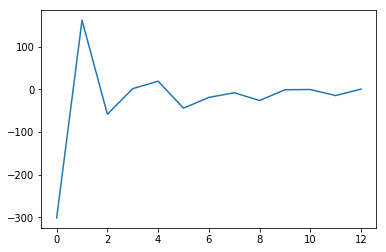

each mean [-301.15  161.77  -58.3     1.59   18.93  -44.06  -19.     -7.99  -26.12
   -0.96   -0.47  -14.58    0.48]


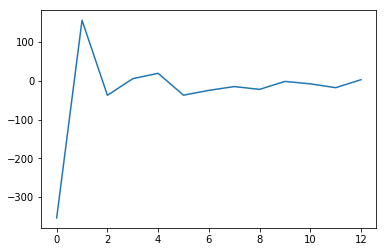

each mean [-354.1   156.51  -37.36    5.52   19.46  -37.1   -24.64  -14.83  -22.03
   -1.53   -7.76  -17.71    2.94]
------------------


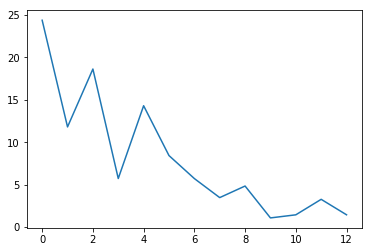

each variance [ 24.38  11.8   18.63   5.72  14.3    8.43   5.72   3.47   4.84   1.08
   1.44   3.27   1.45]


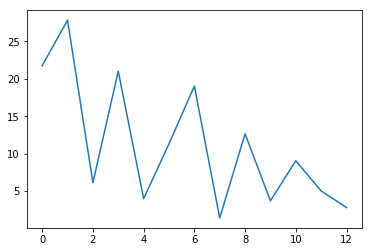

each variance [ 21.74  27.83   6.11  21.     3.97  11.3   19.03   1.39  12.64   3.68
   9.03   4.99   2.78]


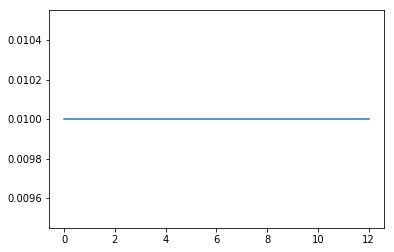

each variance [ 0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01
  0.01]


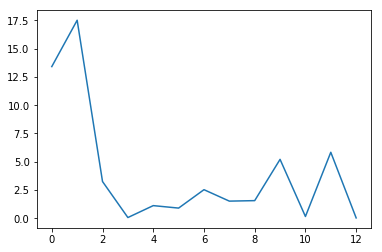

each variance [ 13.42  17.52   3.25   0.06   1.12   0.9    2.53   1.52   1.56   5.21
   0.16   5.84   0.03]
mfccs:----   [-420.68  166.89 -104.67   61.04   51.2   -75.24   -2.43    7.93  -40.7
    4.08   -6.24  -32.35    5.8 ]
mfccs:----   [-394.7   158.16 -108.72   62.48   49.61  -76.81   -1.39    7.34  -38.4
    9.15   -4.72  -30.02    8.87]
mfccs:----   [-419.38  154.45  -97.39   69.54   48.46  -76.33    3.86   12.43  -40.5
    4.44   -4.38  -28.95    7.91]
mfccs:----   [-400.59  155.81  -95.13   64.62   51.76  -74.78   -6.79    6.81  -37.64
    4.93   -5.12  -30.18    5.84]
mfccs:----   [-409.07  166.07 -106.45   67.15   50.51  -81.76   -3.07    7.67  -40.36
    8.28   -4.6   -30.2     9.09]
mfccs:----   [ -4.17e+02   1.61e+02  -9.94e+01   6.78e+01   4.83e+01  -7.81e+01
   1.76e-01   7.95e+00  -4.26e+01   4.96e+00  -6.40e+00  -3.22e+01
   7.48e+00]
mfccs:----   [-392.27  153.47 -102.49   67.61   53.83  -79.11   -8.44    6.5   -38.66
    5.76   -4.52  -30.52    5.84]
mfccs:----   [ 

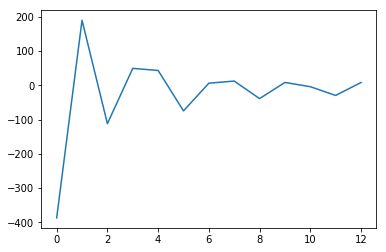

each mean [-387.05  189.52 -112.14   49.14   43.03  -74.85    5.89   12.13  -39.01
    8.05   -4.31  -29.73    7.97]


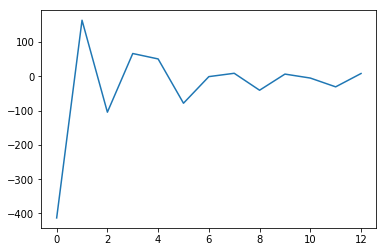

each mean [-412.9   163.4  -104.63   66.39   50.59  -78.52   -0.98    8.76  -40.64
    6.41   -5.13  -30.77    8.1 ]


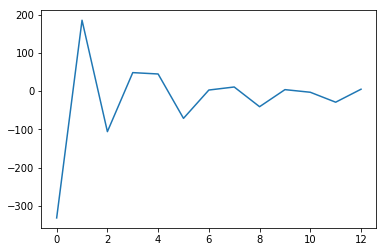

each mean [-331.79  185.01 -106.22   48.07   44.51  -71.48    2.55   10.49  -41.01
    3.59   -3.27  -29.26    4.7 ]


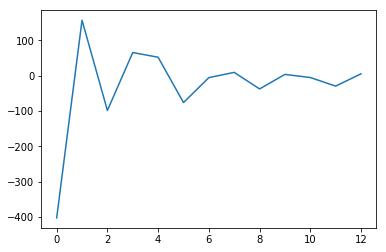

each mean [-402.17  156.8   -98.25   65.44   52.19  -76.01   -5.49    9.39  -37.41
    3.61   -5.16  -29.44    5.31]
------------------


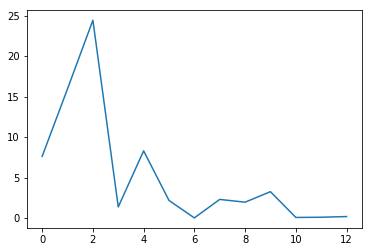

each variance [  7.62e+00   1.60e+01   2.44e+01   1.37e+00   8.30e+00   2.17e+00
   8.59e-03   2.30e+00   1.95e+00   3.25e+00   6.77e-02   9.12e-02
   1.77e-01]


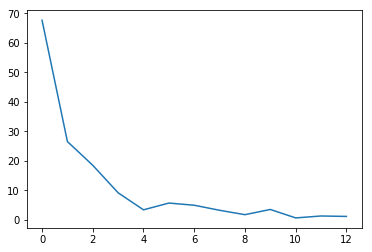

each variance [ 67.66  26.55  18.51   9.19   3.41   5.71   4.97   3.26   1.77   3.54
   0.67   1.33   1.18]


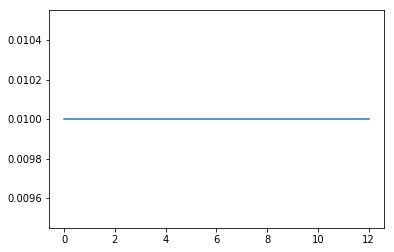

each variance [ 0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01
  0.01]


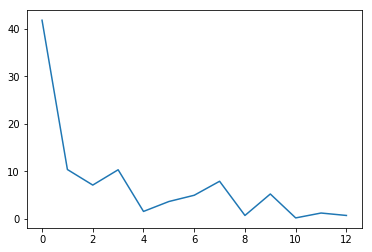

each variance [ 41.77  10.37   7.1   10.32   1.55   3.64   4.95   7.9    0.7    5.22
   0.19   1.22   0.7 ]
Score is :-  -256.516981955
Item (Model):-  (<__main__.HMMTrainer object at 0x1c1c126c50>, 'apple')
Score is :-  -737.477998847
Item (Model):-  (<__main__.HMMTrainer object at 0x1c0f77db70>, 'kiwi')
Score is :-  -130.719763155
Item (Model):-  (<__main__.HMMTrainer object at 0x1c1c5250b8>, 'lime')
Score is :-  -118.612693957
Item (Model):-  (<__main__.HMMTrainer object at 0x1c0f99ba20>, 'banana')
Score is :-  -61.1821656489
Item (Model):-  (<__main__.HMMTrainer object at 0x1c0f7ffb70>, 'pineapple')
Score is :-  -444.715363288
Item (Model):-  (<__main__.HMMTrainer object at 0x1c1bb05978>, 'orange')
Score is :-  -1966.45600522
Item (Model):-  (<__main__.HMMTrainer object at 0x1c0f7692e8>, 'peach')

True: Users/nikhil/Downloads/hmm-speech-recognition-0.1/audio/pineapple
Predicted: pineapple
Score is :-  -369.255723183
Item (Model):-  (<__main__.HMMTrainer object at 0x1c1c126c50>, 'ap

In [21]:
if __name__=='__main__':
    #input folder where you have audio database
    input_folder="/Users/nikhil/Downloads/hmm-speech-recognition-0.1/audio/"
    #creating empty models
    hmm_models=[]
    #going into folder
    for dirname in os.listdir(input_folder):
        #reaching out to everysubfolder
        subfolder=os.path.join(input_folder,dirname)
        if not os.path.isdir(subfolder):
            continue
        #creating label in order to compare with the predicted data
        label = subfolder[subfolder.rfind('/')+1:]
        #Creating a numppy array with dimension 0,13.
        X=np.empty([0,13])
        #for labels
        y_words=[]
        #to remove all the deprecated warnings.
        warnings.filterwarnings("ignore")
        # reaching out to 14 files present in the subfolder
        for filename in[x for x in os.listdir(subfolder) if x.endswith('.wav')][:-1]:
            #filepath of the particular wav file
            filepath=os.path.join(subfolder,filename)
            #extracting mfcc features
            data, sampling_rate = librosa.load(filepath)
            #mfccs' shape would be (13,)
            mfccs = np.mean(librosa.feature.mfcc(y=data, sr=sampling_rate, n_mfcc=13).T,axis=0)
            mfccs = mfccs.astype(np.float)
            print('mfccs:----  ',mfccs)
            #adding new axis
            mfccs=mfccs[:,np.newaxis]
            #reshaping my mfccs
            mfccs=mfccs.reshape(1,13)
            
            if(len(X)==0):
                X= mfccs
            else:
                #appending all the mfccs of all the wav file present in each subfolder to X
                X=np.append(X,mfccs,axis=0)
            #appending labels    
            y_words.append(label)
        #creating hmm trainer class
        hmm_trainer = HMMTrainer()
        #training our hmm model
        hmm_trainer.train(X)
        #appending the model
        hmm_models.append((hmm_trainer,label))
        hmm_trainer= None
    #files to test the model
    input_files = [
                    '/Users/nikhil/Downloads/hmm-speech-recognition-0.1/audio/pineapple/pineapple15.wav',
                    '/Users/nikhil/Downloads/hmm-speech-recognition-0.1/audio/orange/orange15.wav',
                    '/Users/nikhil/Downloads/hmm-speech-recognition-0.1/audio/apple/apple15.wav',
                    '/Users/nikhil/Downloads/hmm-speech-recognition-0.1/audio/kiwi/kiwi15.wav'
                    ]
    #going into each file 
    for input_file in input_files:
        #extracting mfcc feature
        data, sampling_rate = librosa.load(input_file)
        mfccs = np.mean(librosa.feature.mfcc(y=data, sr=sampling_rate, n_mfcc=13).T,axis=0)
        mfccs = mfccs.astype(np.float)
        mfccs=mfccs[:,np.newaxis]
        mfccs=mfccs.reshape(1,13)
        max_score=[float("-inf")]
        output_label=[float("-inf")]
        #going into every model 
        for item in hmm_models:
            hmm_model,label=item
            score=hmm_model.get_score(mfccs)
            print('Score is :- ',score)
            print('Item (Model):- ',item)
            if score > max_score:
                max_score=score
                output_label=label
        print("\nTrue:",input_file[input_file.find('/')+1:input_file.rfind('/')])
        print("Predicted:",output_label)
        warnings.filterwarnings("ignore")